In [ ]:
!pip install bcolz

     |████████████████████████████████| 1.5 MB 5.4 MB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp37-cp37m-linux_x86_64.whl size=2641567 sha256=c41d05a2279bf0d88062685084ae65019d55af390f46cbce641e76587138f6fb
  Stored in directory: /root/.cache/pip/wheels/2c/35/ca/9d914de345914e2446ea285170329f771b8abba2a00f7650bd
Successfully built bcolz


In [ ]:
import numpy as np 
import torch
import torch.nn as nn
import torch.nn.functional as F
from google.colab import files
import bcolz
import pickle
from torch.utils.data import TensorDataset, DataLoader

import csv
import json
import pandas as pd
from collections import Counter
import spacy
import re
nlp = spacy.load('en_core_web_sm')
#stopwords = nlp.Defaults.stop_words

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/505/project/'

data = pd.read_csv(f'{path}/data.csv')
print(data.shape)

(96562, 9)


In [ ]:
tweets_count = []
for item in data['tweet']:
  n = len(str(item).split())
  tweets_count.append(n)

data['tweet_len'] = tweets_count
len(tweets_count)


96562

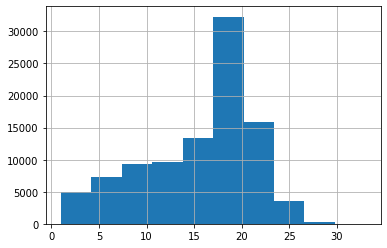

count    96562.000000
mean        15.556803
std          5.810431
min          1.000000
25%         11.000000
50%         17.000000
75%         20.000000
max         33.000000
dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.Series(tweets_count).hist()
plt.show()
pd.Series(tweets_count).describe()

In [ ]:
from collections import Counter
print('video:' , Counter(data.video))
print('photo:' , Counter(data.photo))
print('animated_gif:', Counter(data.animated_gif))

video: Counter({0: 96562})
photo: Counter({0: 88522, 1: 8040})
animated_gif: Counter({0: 96562})


In [ ]:
Counter(data.tweet_len).most_common()[:-10-1:-1] 

[(33, 1),
 (32, 1),
 (31, 5),
 (30, 7),
 (29, 34),
 (28, 70),
 (27, 158),
 (1, 403),
 (26, 432),
 (25, 977)]

In [ ]:
data = data[data['tweet_len'] > 1]
needed = ['user_friends_count', 'user_followers_count', 'favorite_count','user_statuses_count', 'tweet','retweets']
df = data[needed]
print(df.shape)


(96159, 6)


In [ ]:
Counter(df.retweets).most_common(10)


[(0, 64978),
 (1, 8143),
 (2, 4240),
 (3, 3280),
 (4, 2523),
 (5, 2007),
 (6, 1506),
 (7, 1226),
 (8, 932),
 (9, 801)]

In [ ]:
temp = pd.DataFrame.from_dict(Counter(df.retweets), orient='index').reset_index()
temp.columns = ['num', 'count']
temp.shape

(312, 2)

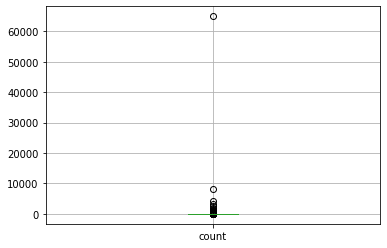

In [ ]:
temp.boxplot(column=['count']) 

In [ ]:
class_0 = df[df['retweets'] == 0]
class_1 = df[df['retweets'] == 1]
class_not01 = df[df['retweets'] > 1]

In [ ]:
class_0_under = class_0.sample(4000)
class_1_under = class_1.sample(4000)
df2 = pd.concat([class_0_under, class_1_under, class_not01], axis=0)

In [ ]:
df[df['retweets'] >50]

,user_friends_count,user_followers_count,favorite_count,user_statuses_count,tweet,retweets,cat
1633,13723,120597,289,153810,a hattrick on debut for the sbproteasyoungest ...,87,7
2735,6683,99633,103,152258,make sure you do n't miss the first ever intel...,61,7
2739,6683,99633,106,152258,join us as we celebrate our brand launch with ...,54,7
2758,6683,99633,153,152258,hello mzansi meet the new us and our new logo ...,103,7
2761,6683,99633,671,152258,when the time came to reimagine a new absa we ...,230,7
...,...,...,...,...,...,...,...
94514,26139,217532,294,181091,keep snapping and sharing with telkomfam we se...,70,7
95530,26139,217530,352,181091,welcome the all new <user> note including a ...,71,7
95888,26139,217530,0,181091,rt <user> when king b opens his mouthmeidolssa...,68,7
96158,26139,217530,237,181091,are you a game changer the galaxy note is he...,80,7


In [ ]:
Counter(df['retweets'])

Counter({0: 64978,
         1: 8143,
         2: 4240,
         3: 3280,
         4: 2523,
         5: 2007,
         6: 1506,
         7: 1226,
         8: 932,
         9: 801,
         10: 622,
         11: 556,
         12: 468,
         13: 394,
         14: 309,
         15: 297,
         16: 297,
         17: 213,
         18: 197,
         19: 179,
         20: 159,
         21: 148,
         22: 140,
         23: 135,
         24: 114,
         25: 114,
         26: 91,
         27: 95,
         28: 81,
         29: 92,
         30: 71,
         31: 81,
         32: 69,
         33: 79,
         34: 55,
         35: 58,
         36: 67,
         37: 52,
         38: 45,
         39: 45,
         40: 48,
         41: 37,
         42: 33,
         43: 26,
         44: 44,
         45: 33,
         46: 28,
         47: 28,
         48: 33,
         49: 24,
         50: 25,
         51: 25,
         52: 19,
         53: 24,
         54: 17,
         55: 15,
         56: 27,
      

In [ ]:
def convert(row):
  if row['retweets'] >15:
    cat = 7
  elif row['retweets'] >8:
    cat= 6
  elif row['retweets'] >5:
    cat = 5
  elif row['retweets'] >=4:
    cat = 4
  else:
    cat = row['retweets']
  return cat
df2['cat'] = df2.apply(convert, axis=1)

In [ ]:
Counter(df2.cat)

Counter({0: 4000,
         1: 4000,
         2: 4240,
         3: 3280,
         4: 4530,
         5: 3664,
         6: 3447,
         7: 3877})

In [ ]:
df2.shape

(31038, 7)

In [ ]:
df3 = df2.iloc[:30720]
df3.shape

(30720, 7)

In [ ]:
onehot_encoded = list()
for item in df3['cat']:
	values = [0 for _ in range(8)]
	values[item] = 1
	onehot_encoded.append(values)

In [ ]:
onehot_encoded[0]

[1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
len(onehot_encoded)

30720

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,:-2], onehot_encoded, test_size = 0.1, random_state=42)
print(len(X_train), len(X_test))
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 2816, random_state=42)
print(len(X_train), len(X_test), len(X_val))

27648 3072
24832 3072 2816


In [ ]:
X_train_tweet = X_train.tweet
X_val_tweet = X_val.tweet
X_test_tweet = X_test.tweet

X_train_meta = X_train.iloc[:,:-1]
X_val_meta = X_val.iloc[:,:-1]
X_test_meta = X_test.iloc[:,:-1]

In [ ]:
# Building vocabulary for training data
def word_count(data):
  words_counter = Counter()
  for line in data:
    words =  str(line).split()
    for w in words:
      words_counter.update([w])
  
  words_counter_clean = {k:v for k,v in words_counter.items() if v > 1} # Removing the words that only appear once
  sorted_words = sorted(words_counter_clean, key = words_counter_clean.get, reverse = True) # Sorting the words frequency in desc order
  sorted_words = ['UNK','PAD', '<s>', '</s>' ] + sorted_words 

  return words_counter, words_counter_clean, sorted_words
  
words_counter, words_counter_clean, sorted_words = word_count(X_train_tweet)

In [ ]:
# Not using slicing window padding
def padding(data, seq_len):
  sequences = []
  for line in data:
    line = f"{'<s>'} {line} {'</s>'}"
    n_token = len(line.split())
    
    if n_token >= seq_len:
      seq = line.split()[:seq_len] 
      sequences.append(" ".join(seq))

    else:
      seq = line.split()
      for i in range(seq_len - n_token):
          seq.append('PAD')
      sequences.append(" ".join(seq))
  return sequences

X_train_pad = padding(X_train_tweet, 20)
X_val_pad = padding(X_val_tweet, 20)
X_test_pad = padding(X_test_tweet, 20)

In [ ]:
# replace the words that only appear once with UNKNOWN
def generate_sentence(data):
  sequences = []
  for line in data:
    temp = []
    words = line.split()
    for word in words:
      if word in sorted_words:
        temp.append(word)
      else:
        temp.append('UNK')
    sequences.append(" ".join(temp))
  return sequences

X_train_final = generate_sentence(X_train_pad)
X_val_final = generate_sentence(X_val_pad)
X_test_final = generate_sentence(X_test_pad)

In [ ]:
# Using tweets training data vocabulary

# Dictionaries to store the word to index mappings and vice versa
word2idx = {o:i for i,o in enumerate(sorted_words)}
idx2word = {i:o for i,o in enumerate(sorted_words)}


# convert text sequences to integer sequences
X_train_int = np.zeros((len(X_train_final), 20), dtype = int)
for i, data in enumerate(X_train_final):
  X_train_int[i] = [word2idx[w] for w in data.split()]

X_val_int = np.zeros((len(X_val_final), 20), dtype = int)
for i, data in enumerate(X_val_final):
  X_val_int[i] = [word2idx[w] for w in data.split()]

X_test_int = np.zeros((len(X_test_final), 20), dtype = int)
for i, data in enumerate(X_test_final):
  X_test_int[i] = [word2idx[w] for w in data.split()]



In [ ]:
# convert lists to numpy arrays
X_train_int = np.array(X_train_int)
y_train_int = np.array(y_train)

X_val_int = np.array(X_val_int)
y_val_int = np.array(y_val)

X_test_int = np.array(X_test_int)
y_test_int = np.array(y_test)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# create Tensor datasets
#train_data = TensorDataset(torch.from_numpy(X_train_int),  torch.from_numpy(y_train_int))
#val_data = TensorDataset(torch.from_numpy(X_val_int),torch.from_numpy(y_val_int))
#test_data = TensorDataset(torch.from_numpy(X_test_int), torch.from_numpy(y_test_int))


train_data = TensorDataset(torch.from_numpy(X_train_int), torch.from_numpy(X_train_meta.to_numpy()), torch.from_numpy(y_train_int))
val_data = TensorDataset(torch.from_numpy(X_val_int),torch.from_numpy(X_val_meta.to_numpy()), torch.from_numpy(y_val_int))
test_data = TensorDataset(torch.from_numpy(X_test_int),torch.from_numpy(X_test_meta.to_numpy()), torch.from_numpy(y_test_int))

# dataloaders
batch_size = 256

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

# Glove Embeddings

In [ ]:
# Using glove weights
words_glove = []
idx_glove = 0
word2idx_glove = {}
vectors_glove = []

with open(f'{path}/glove.twitter.27B.100d.txt', 'rb') as f:
  for l in f:
    line = l.decode().split()
    word = line[0]
    words_glove.append(word)
    word2idx_glove[word] = idx_glove
    idx_glove += 1
    vect = np.array(line[1:]).astype(np.float)
    vectors_glove.append(vect)
    

glove = {w: vectors_glove[word2idx_glove[w]] for w in words_glove}
matrix_len = len(sorted_words)
weights_matrix = np.zeros((matrix_len, 100))
words_found = 0

for i, word in enumerate(sorted_words):
  try: 
    weights_matrix[i] = glove[word] # if alr in the vocab, load its pre-trained word vector.
    words_found += 1
  except KeyError:
    weights_matrix[i] = np.random.normal(scale=0.6, size=(100, ))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


# Neural Net

### Retweet Network: Takes in a tweet as input, can use embedded version, and can any combination of bidirectional, LSTM, GRU, concatenates it with metadata vector, and uses a feedforward neural net with 1 hidden layer to perform a regression prediction on the retweet count. 

#### Parameter custom_embeddings is either a tuple: (weight_matrix , none_trainable), or None.
#### none_trainable is either True or False or Nothing

In [ ]:
def create_emb_layer(weights_matrix, non_trainable=False):
  num_embeddings, embedding_dim = weights_matrix.shape
  emb_layer = nn.Embedding(num_embeddings, embedding_dim)
  emb_layer.load_state_dict({'weight': torch.from_numpy(weights_matrix)})
  if non_trainable:
      emb_layer.weight.requires_grad = False
  return emb_layer, num_embeddings, embedding_dim

class RetweetNet(nn.Module):
  def __init__(self, vocab_size, hidden_state_sizes, meta_data_len, output_size, embedding_dim, hidden_dim, 
                 n_layers, drop_prob=0.5, custom_embeddings = None, bidirectional = False, GRU = False):
    super().__init__()
    self.GRU_val = GRU
    self.bidirectional = bidirectional
    self.output_size = output_size
    self.n_layers = n_layers
    self.hidden_dim = hidden_dim
        
    if custom_embeddings is None: 
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
    else: 
        assert len(custom_embeddings) == 2 and isinstance(custom_embeddings, tuple), "custom embeddings must be of form: (weight_matrix, non_trainable)"
        weights_matrix, non_trainable = custom_embeddings
        self.embedding, num_embeddings, embedding_dim = create_emb_layer(weights_matrix, non_trainable)
        
    if GRU == False: 
        self.Gate = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True, bidirectional = bidirectional)
    else: 
        self.Gate = nn.GRU(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True, bidirectional = bidirectional)
    self.dropout = nn.Dropout(0.2)
    self.fc1 = nn.Linear(hidden_dim, hidden_state_sizes[0])
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax(dim=1)
        
    #hidden_state_sizes[0] is the size of the output of lstm 
    self.fc2 = nn.Linear(hidden_state_sizes[0] + meta_data_len, hidden_state_sizes[1])
        
    #hidden_state_sizes[1] is the size of the first and only hidden layer
    self.fc3 = nn.Linear(hidden_state_sizes[1], 8)

        
  def forward(self, x, meta_data, hidden):
    batch_size = x.size(0)
    x = x.long()
    embeds = self.embedding(x)
    gru_out, hidden = self.Gate(embeds, hidden)
    gru_out = gru_out.contiguous().view(-1, self.hidden_dim)
    
    out = self.dropout(gru_out)
    out = self.fc1(out)

    out = out.view(batch_size, -1, self.hidden_dim)
    out = out[:,-1, :] 

    # combine hidden state and meta_data
    ################# ################# #################
    #out = torch.cat((out, meta_data), dim = 1) #meta_data is of shape (batch_size, -1)
        
    out = self.fc2(out)
        
    # applying dropout before relu since relu already sets some neurons to 0
    out = self.dropout(out)
    out = self.relu(out)
    out = self.fc3(out)
    out = self.softmax(out)
        
    return out, hidden
    
  def init_hidden(self, batch_size):
    weight = next(self.parameters()).data
    n = 1
    if self.bidirectional == True: 
      n = 2
    if self.GRU_val == False:
      return (weight.new(self.n_layers * n, batch_size, self.hidden_dim).zero_().to('cuda'),
              weight.new(self.n_layers * n, batch_size, self.hidden_dim).zero_().to('cuda'))
    else:
      return  weight.new(self.n_layers * n, batch_size, self.hidden_dim).zero_().to('cuda')


def train_retweet_predictor(model, epochs = 100, print_every = 1000, clip = 5, valid_loss_min = np.Inf, lr=0.005, batch_size = 400, device = 'cuda', GRU = False, weight_decay = 1e-5): 
  counter = 0
  print_every = 150
  training_stats = []
  model.train()
    
  criterion = nn.CrossEntropyLoss()
    
  # weight decay is the l2 regularization penalty 
  optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)


  training_stats = []
  for i in range(epochs):
    total_train_loss = []
    total_val_loss = []
  

    h = model.init_hidden(batch_size)
    for tweets, meta_data, labels in train_loader:
      counter += 1
      if GRU == False: 
        h = tuple([each.data for each in h])
      else:
        h = h.data
      tweets, meta_data, labels = tweets.to(device), meta_data.to(device), labels.to(device)
      model.zero_grad()
      output, h = model(tweets, meta_data, h)
      loss = criterion(output.squeeze(), labels.float())
      loss.backward()
      total_train_loss.append(loss.item())
      nn.utils.clip_grad_norm_(model.parameters(), clip)
      optimizer.step()

      if counter % print_every == 0:
        val_h = model.init_hidden(batch_size)
        model.eval()
        for tweets, meta_data, labels in val_loader:
          if GRU == False: 
            val_h = tuple([each.data for each in val_h])
          else:
            val_h = val_h.data

          tweets, meta_data, labels = tweets.to(device), meta_data.to(device), labels.to(device)
          
          output, val_h = model(tweets, meta_data, val_h)
          val_loss = criterion(output.squeeze(), labels.float())
          total_val_loss.append(val_loss.item())
        
        model.train()
        print("Epoch: {}/{}...".format(i+1, epochs),
            "Step: {}...".format(counter),
            "Loss: {:.6f}...".format(loss.item()),
            "Val Loss: {:.6f}".format(np.mean(total_val_loss)))
    
      

    #print('----------------------------------------------------------')
    #avg_train_loss = np.mean(total_train_loss)  
    #avg_val_loss = np.mean(total_val_loss)  
    #median_train_loss = np.median(total_train_loss)  
    #print("Average train loss: {:.6f}...".format(avg_train_loss),  " Median train loss:  {:.6f}...".format(median_train_loss))
    #training_stats.append({'epoch': i + 1, 'Training Loss': avg_train_loss})

      



In [ ]:
vocab_size = len(sorted_words)
output_size = len(X_train_int)
embedding_dim = 100
hidden_dim = 256
n_layers = 2

net = RetweetNet(vocab_size = vocab_size, hidden_state_sizes = [256,128], meta_data_len = 0, output_size = output_size, embedding_dim = embedding_dim, hidden_dim  = hidden_dim, 
                 n_layers =n_layers, GRU = True, bidirectional = False)
net.cuda()

RetweetNet(
  (embedding): Embedding(11127, 100)
  (Gate): GRU(100, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=256, out_features=256, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=8, bias=True)
)

In [ ]:
train_retweet_predictor(net, epochs = 50, batch_size = 256, device = 'cuda', lr = 1e-06,GRU = True)

Epoch: 2/50... Step: 150... Loss: 2.180259... Val Loss: 2.159662
Epoch: 4/50... Step: 300... Loss: 2.149009... Val Loss: 2.159662
Epoch: 5/50... Step: 450... Loss: 2.176353... Val Loss: 2.159662
Epoch: 7/50... Step: 600... Loss: 2.090415... Val Loss: 2.159662
Epoch: 8/50... Step: 750... Loss: 2.156821... Val Loss: 2.159662
Epoch: 10/50... Step: 900... Loss: 2.117759... Val Loss: 2.159662


In [ ]:
def error_retweet_predictor(model, batch_size = 359, device = 'cuda', GRU = False): 
  test_losses = []
  num_correct = 0
  model.cuda()

  h = model.init_hidden(batch_size)
  criterion = nn.CrossEntropyLoss()
  

  model.eval()
  for tweets, meta_data, labels in test_loader:
    if GRU == True: 
      h = h.data
    else: 
      h = tuple([each.data for each in h])
    tweets, meta_data, labels = tweets.to(device), meta_data.to(device), labels.to(device)
    output, h = model(tweets, meta_data, h)
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    #pred = torch.round(output.squeeze())
    _, test_predicted = torch.max(output.data,1)
    _, labels = torch.max(labels,1)
    #print(test_predicted)
    num_correct += torch.eq(labels, test_predicted).sum()
    
    #correct_tensor = pred.eq(labels.float().view_as(pred))

    #correct = np.squeeze(correct_tensor.cpu().numpy())

    #num_correct += np.sum(correct)   
   
  test_acc = num_correct/len(test_loader.dataset)
  print(num_correct, len(test_loader.dataset))
  print("Average test loss: {:.3f}".format(np.mean(test_losses)))
  #print("Median test loss: {:.3f}".format(np.median(test_losses)))
  print("Test accuracy: {:.3f}".format(test_acc))

In [ ]:
error_retweet_predictor(net, batch_size = 256, device = 'cuda', GRU = True) 

tensor(347, device='cuda:0') 3072
Average test loss: 2.161
Test accuracy: 0.113


In [ ]:
class RetweetNet(nn.Module):
  def __init__(self, vocab_size, hidden_state_sizes, meta_data_len, output_size, embedding_dim, hidden_dim, 
                 n_layers, drop_prob=0.5, custom_embeddings = None, bidirectional = False, GRU = False):
    super().__init__()
    self.GRU_val = GRU
    self.bidirectional = bidirectional
    self.output_size = output_size
    self.n_layers = n_layers
    self.hidden_dim = hidden_dim
        
    if custom_embeddings is None: 
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
    else: 
        assert len(custom_embeddings) == 2 and isinstance(custom_embeddings, tuple), "custom embeddings must be of form: (weight_matrix, non_trainable)"
        weights_matrix, non_trainable = custom_embeddings
        self.embedding, num_embeddings, embedding_dim = create_emb_layer(weights_matrix, non_trainable)
        
    if GRU == False: 
        self.Gate = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True, bidirectional = bidirectional)
    else: 
        self.Gate = nn.GRU(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True, bidirectional = bidirectional)
    self.dropout = nn.Dropout(0.2)
    self.fc1 = nn.Linear(hidden_dim, hidden_state_sizes[0])
    self.relu = nn.ReLU()
        
    #hidden_state_sizes[0] is the size of the output of lstm 
    self.fc2 = nn.Linear(hidden_state_sizes[0] + meta_data_len, hidden_state_sizes[1])
        
    #hidden_state_sizes[1] is the size of the first and only hidden layer
    self.fc3 = nn.Linear(hidden_state_sizes[1], 1)

        
  def forward(self, x, meta_data, hidden):
    batch_size = x.size(0)
    x = x.long()
    embeds = self.embedding(x)
    gru_out, hidden = self.Gate(embeds, hidden)
    gru_out = gru_out.contiguous().view(-1, self.hidden_dim)
    
    out = self.dropout(gru_out)
    out = self.fc1(out)

    out = out.view(batch_size, -1, self.hidden_dim)
    out = out[:,-1, :] 

    # combine hidden state and meta_data
    ################# ################# #################
    out = torch.cat((out, meta_data), dim = 1) #meta_data is of shape (batch_size, -1)
        
    out = self.fc2(out)
        
    # applying dropout before relu since relu already sets some neurons to 0
    out = self.dropout(out)
    out = self.relu(out)
    out = self.fc3(out)
        
    return out, hidden
    
  def init_hidden(self, batch_size):
    weight = next(self.parameters()).data
    n = 1
    if self.bidirectional == True: 
      n = 2
    if self.GRU_val == False:
      return (weight.new(self.n_layers * n, batch_size, self.hidden_dim).zero_().to('cuda'),
              weight.new(self.n_layers * n, batch_size, self.hidden_dim).zero_().to('cuda'))
    else:
      return  weight.new(self.n_layers * n, batch_size, self.hidden_dim).zero_().to('cuda')


def train_retweet_predictor(model, epochs = 100, print_every = 1000, clip = 5, valid_loss_min = np.Inf, lr=0.005, batch_size = 400, device = 'cuda', GRU = False, weight_decay = 1e-5): 
  counter = 0
  print_every = 150
  training_stats = []
  model.train()
    
  criterion = nn.MSELoss()
    
  # weight decay is the l2 regularization penalty 
  optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)


  training_stats = []
  for i in range(epochs):
    total_train_loss = []
    total_val_loss = []
  

    h = model.init_hidden(batch_size)
    for tweets, meta_data, labels in train_loader:
      counter += 1
      if GRU == False: 
        h = tuple([each.data for each in h])
      else:
        h = h.data
      tweets, meta_data, labels = tweets.to(device), meta_data.to(device), labels.to(device)
      model.zero_grad()
      output, h = model(tweets, meta_data, h)
      loss = criterion(output.squeeze(), labels.float())
      loss.backward()
      total_train_loss.append(loss.item())
      nn.utils.clip_grad_norm_(model.parameters(), clip)
      optimizer.step()

      if counter % print_every == 0:
        val_h = model.init_hidden(batch_size)
        model.eval()
        for tweets, meta_data, labels in val_loader:
          if GRU == False: 
            val_h = tuple([each.data for each in val_h])
          else:
            val_h = val_h.data

          tweets, meta_data, labels = tweets.to(device), meta_data.to(device), labels.to(device)
          
          output, val_h = model(tweets, meta_data, val_h)
          val_loss = criterion(output.squeeze(), labels.float())
          total_val_loss.append(val_loss.item())
        
        model.train()
        print("Epoch: {}/{}...".format(i+1, epochs),
            "Step: {}...".format(counter),
            "Loss: {:.6f}...".format(loss.item()),
            "Val Loss: {:.6f}".format(np.mean(total_val_loss)))
     



In [ ]:
vocab_size = len(sorted_words)
output_size = len(X_train_int)
embedding_dim = 100
hidden_dim = 256
n_layers = 2

net = RetweetNet(vocab_size = vocab_size, hidden_state_sizes = [256,128], meta_data_len = 4, output_size = output_size, embedding_dim = embedding_dim, hidden_dim  = hidden_dim, 
                 n_layers =n_layers, GRU = True, bidirectional = False)
net.cuda()

RetweetNet(
  (embedding): Embedding(11127, 100)
  (Gate): GRU(100, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=256, out_features=256, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=260, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)

In [ ]:
train_retweet_predictor(net, epochs = 20, batch_size = 256, device = 'cuda', lr = 1e-06,GRU = True)

Epoch: 2/20... Step: 150... Loss: 13945278.000000... Val Loss: 547035.002841
Epoch: 4/20... Step: 300... Loss: 12154663.000000... Val Loss: 297339.819602
Epoch: 5/20... Step: 450... Loss: 7641081.500000... Val Loss: 177986.725852
Epoch: 7/20... Step: 600... Loss: 10039762.000000... Val Loss: 100861.974432
Epoch: 8/20... Step: 750... Loss: 6030792.000000... Val Loss: 66152.366655
Epoch: 10/20... Step: 900... Loss: 6535027.000000... Val Loss: 51764.672230
Epoch: 11/20... Step: 1050... Loss: 8651229.000000... Val Loss: 44701.617365
Epoch: 13/20... Step: 1200... Loss: 13521440.000000... Val Loss: 38858.325728
Epoch: 14/20... Step: 1350... Loss: 8789524.000000... Val Loss: 37455.836825
Epoch: 16/20... Step: 1500... Loss: 8275924.500000... Val Loss: 34446.629528
Epoch: 18/20... Step: 1650... Loss: 10241644.000000... Val Loss: 31953.952770
Epoch: 19/20... Step: 1800... Loss: 14811671.000000... Val Loss: 30727.829146


In [ ]:
error_retweet_predictor(net, batch_size = 256, device = 'cuda', GRU = True) 

33 3072
Average test loss: 34057.910
Median test loss: 26435.905
Test accuracy: 0.011
